# Three-Generations-Seeking-Romance
### (Üç Nesil Aşk Arayışında) – Regresyon ve Sınıflandırma

### 🎯 **Projenin Amacı:**  
Bu projenin amacı, OKCupid platformundan elde edilen yaklaşık 60.000 anonimleştirilmiş kullanıcı profili üzerinden, 
kullanıcıların çevrimiçi tanışma profillerinde yer alan bilgilerle **yaşlarının** ve **ait oldukları neslin** 
(Millennial, Gen X, Boomer) tahmin edilip edilemeyeceğini incelemektir.

Projede iki temel soru ele alınmaktadır:

1. **Bir kullanıcının profil bilgileri yaşını tahmin edebilir mi?**  
   Bu soru, regresyon teknikleri ve derin öğrenme modelleri kullanılarak araştırılacaktır.

2. **Bir kullanıcının profil bilgileri kullanıcının hangi nesle ait olduğunu belirleyebilir mi?**  
   Bu soru ise sınıflandırma modelleri ve derin öğrenme yöntemleri ile değerlendirilecektir.

Profildeki metinsel, kategorik ve sayısal özellikler analiz edilerek hangi değişkenlerin kestirim gücünü artırdığı belirlenecek; 
regresyon ve sınıflandırma için en iyi performansı veren model mimarileri oluşturulacaktır. 
Çalışmanın sonunda, kullanıcı profillerinin demografik tahminlerde ne kadar etkili olduğu ortaya konacak ve çevrimiçi davranış analizi açısından 
anlamlı içgörüler geliştirilecektir.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 📍 1. Data Preparation (Veri Hazırlama)
- Eksik değer analizi ve doldurma  
- Essay sütunlarının birleştirilmesi  
- Kategorik değişkenlerin temizlenmesi  
- Yaşa göre “generation” sütununun oluşturulması  

In [2]:
df = pd.read_csv("profiles.csv", low_memory=False)

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(60552, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [7]:
df.describe()

,age,height,income
count,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155
std,9.445488,3.905229,91428.807808
min,18.000000,36.000000,-1.000000
25%,25.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,36.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [8]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [9]:
df.corr(numeric_only=True)

,age,height,income
age,1.000000,-0.022078,0.011424
height,-0.022078,1.000000,0.073105
income,0.011424,0.073105,1.000000


<Axes: >

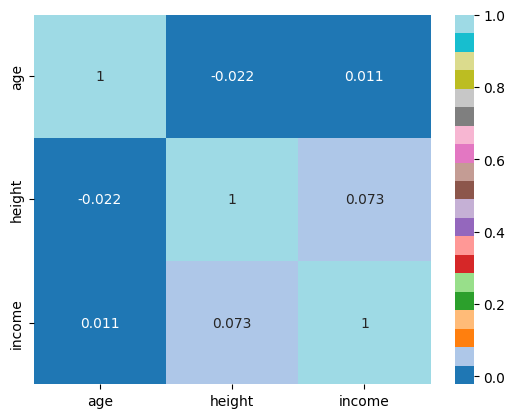

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='tab20')

In [11]:
df = df.drop(columns=["last_online", "offspring", "pets", "speaks"])

In [12]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job', 'location',
       'orientation', 'religion', 'sex', 'sign', 'smokes', 'status'],
      dtype='object')

In [13]:
df['height'] = df['height'].fillna(df['height'].median())

In [14]:
df['income'] = df['income'].fillna(-1)

In [15]:
df = df[df["age"].notnull()].reset_index(drop=True)

In [16]:
essay_cols = [f"essay{i}" for i in range(10) if f"essay{i}" in df.columns]

In [17]:
df[essay_cols] = df[essay_cols].fillna("")

In [18]:
df["essay_all"] = df[essay_cols].agg(" ".join, axis=1)

In [19]:
df = df.drop(columns=essay_cols)

In [20]:
cat_cols = df.select_dtypes(include="object").columns.tolist()

In [21]:
cat_cols = [c for c in cat_cols if c != "essay_all"]

In [22]:
df[cat_cols] = df[cat_cols].fillna("Unknown")

In [23]:
df["generation"] = np.select(
    [
        (df["age"] >= 18) & (df["age"] <= 32),
        (df["age"] >= 33) & (df["age"] <= 47),
        (df["age"] >= 48) & (df["age"] <= 70),
    ],
    [
        "Millennial",
        "GenX",
        "Boomer",
    ],
    default="Unknown"
)

In [24]:
df = df[df["generation"] != "Unknown"].reset_index(drop=True)

### 📍 2. Feature Engineering & Encoding
- Essay metinleri için **TF-IDF** vektörizasyonu  
- Kategorik değişkenler için **OneHotEncoder**  
- Sayısal değişkenlerin modele aynen aktarılması (passthrough)  

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
gen_encoder = LabelEncoder()

In [27]:
df["generation_encoded"] = gen_encoder.fit_transform(df["generation"])

In [28]:
df[["generation", "generation_encoded"]].head()

,generation,generation_encoded
0,Millennial,2
1,GenX,1
2,GenX,1
3,Millennial,2
4,Millennial,2


Text(0.5, 1.0, 'Yaş Dağılımı')

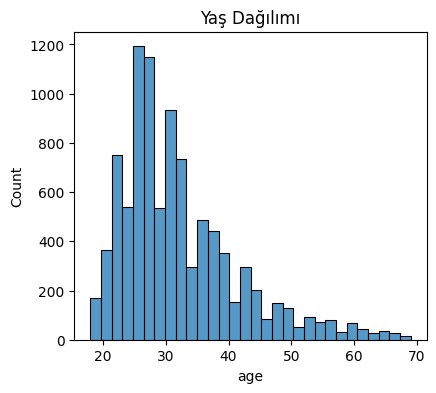

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["age"], bins=30)
plt.title("Yaş Dağılımı")

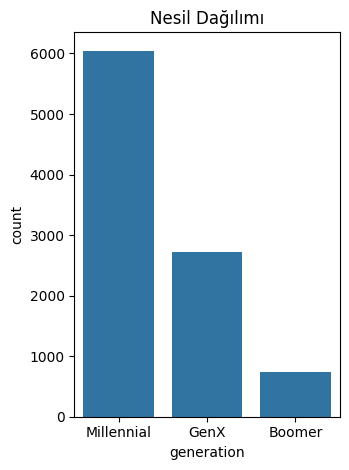

In [30]:
plt.subplot(1,2,2)
sns.countplot(x="generation", data=df)
plt.title("Nesil Dağılımı")
plt.tight_layout()
plt.show()

In [31]:
numeric_features = df.select_dtypes(include=["int64","float64"]).columns.tolist()

In [32]:
for target_col in ["age", "generation_encoded"]:
    if target_col in numeric_features:
        numeric_features.remove(target_col)

In [33]:
categorical_features = df.select_dtypes(include="object").columns.tolist()

In [34]:
categorical_features = [c for c in categorical_features if c not in ["essay_all", "generation"]]

In [35]:
text_feature = "essay_all"

In [36]:
numeric_features, categorical_features, text_feature

(['height', 'income'],
 ['body_type',
  'diet',
  'drinks',
  'drugs',
  'education',
  'ethnicity',
  'job',
  'location',
  'orientation',
  'religion',
  'sex',
  'sign',
  'smokes',
  'status'],
 'essay_all')

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("text", TfidfVectorizer(max_features=500, stop_words="english"), text_feature),
    ]
)

### 📍 3. Modeling (Modelleme)
- Train–test veri bölünmesi  
- Pipeline oluşturulması  
- GradientBoosting & RandomForest modellerinin eğitilmesi  
- Regresyon ve sınıflandırma sonuçlarının değerlendirilmesi  

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_reg = df.drop(columns=["age"])   # tüm diğer kolonlar kullanılabilir

In [41]:
y_reg = df["age"]

In [42]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
gbr_pipe = Pipeline(steps=[("preprocess", preprocess),("model", GradientBoostingRegressor(random_state=42))])

In [45]:
gbr_pipe.fit(xr_train, yr_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [46]:
yr_pred_gbr = gbr_pipe.predict(xr_test)

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf_reg_pipe = Pipeline(steps=[("preprocess", preprocess),("model", RandomForestRegressor(n_estimators=200,random_state=42,n_jobs=-1))])

In [50]:
rf_reg_pipe.fit(xr_train, yr_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [51]:
yr_pred_rf = rf_reg_pipe.predict(xr_test)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lin_reg_pipe = Pipeline(steps=[("preprocess", preprocess),("model", LinearRegression())])

In [66]:
lin_reg_pipe.fit(xr_train, yr_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [67]:
yr_pred_lin = lin_reg_pipe.predict(xr_test)

In [68]:
lin_mae = mean_absolute_error(yr_test, yr_pred_lin)

In [69]:
lin_mse = mean_squared_error(yr_test, yr_pred_lin)

In [52]:
x_cls = df.drop(columns=["generation_encoded", "generation"])  # orijinal string kolonu da çıkar

In [53]:
y_cls = df["generation_encoded"]

In [54]:
xc_train, xc_test, yc_train, yc_test = train_test_split(x_cls, y_cls, test_size=0.2, random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [56]:
rf_clf_pipe = Pipeline(steps=[("preprocess", preprocess),("model", RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=-1))])

In [57]:
rf_clf_pipe.fit(xc_train, yc_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [58]:
yc_pred_rf = rf_clf_pipe.predict(xc_test)

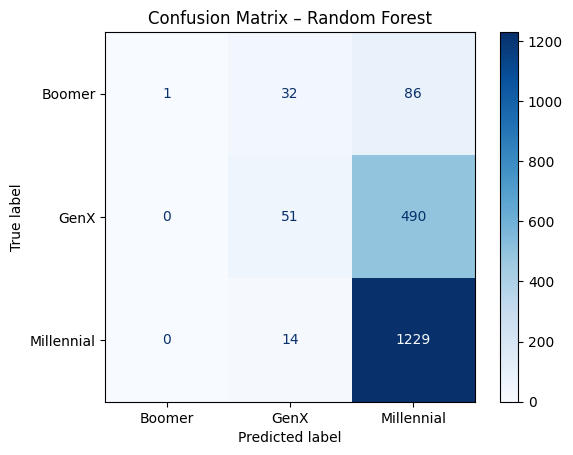

In [59]:
ConfusionMatrixDisplay.from_predictions(yc_test, yc_pred_rf,display_labels=gen_encoder.classes_,cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.show()

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gbr_clf_pipe = Pipeline(steps=[("preprocess", preprocess),("model", GradientBoostingClassifier(random_state=42))])

In [62]:
gbr_clf_pipe.fit(xc_train, yc_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [63]:
yc_pred_gbr = gbr_clf_pipe.predict(xc_test)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
log_clf_pipe = Pipeline(steps=[("preprocess", preprocess),("model", LogisticRegression(max_iter=500))])

In [73]:
log_clf_pipe.fit(xc_train, yc_train)

C:\Users\leyuz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [74]:
yc_pred_log = log_clf_pipe.predict(xc_test)

In [75]:
log_acc = accuracy_score(yc_test, yc_pred_log)

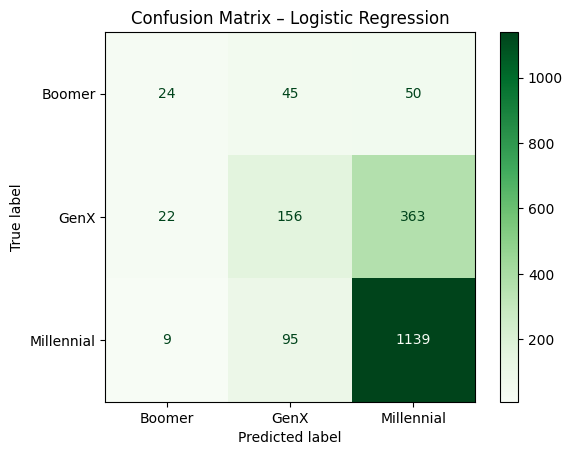

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    yc_test, yc_pred_log,
    display_labels=gen_encoder.classes_,
    cmap="Greens"
)
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

In [79]:
regression_results = pd.DataFrame({
    "Model": ["Gradient Boosting", "Random Forest", "Linear Regression"],
    "MAE": [
        mean_absolute_error(yr_test, yr_pred_gbr),
        mean_absolute_error(yr_test, yr_pred_rf),
        lin_mae
    ],
    "MSE": [
        mean_squared_error(yr_test, yr_pred_gbr),
        mean_squared_error(yr_test, yr_pred_rf),
        lin_mse
    ]
})

regression_results

,Model,MAE,MSE
0,Gradient Boosting,5.437145,52.365104
1,Random Forest,5.597530,54.748486
2,Linear Regression,6.239315,64.931692


In [77]:
classification_results = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(yc_test, yc_pred_rf),
        accuracy_score(yc_test, yc_pred_gbr),
        log_acc
    ]
})

classification_results

,Model,Accuracy
0,Random Forest,0.673148
1,Gradient Boosting,0.688387
2,Logistic Regression,0.693116
